#Bayes Guassian Classifier (Non-Naive)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [21]:
data = pd.read_csv('/content/drive/MyDrive/ITC Data Science/Training/Datasets/MNIST_train.csv')

In [92]:
data

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,59995,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,59996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,59997,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,59998,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X=data.to_numpy()

In [ ]:
X[0,:]

In [ ]:
X[0,2:]

In [23]:
y=X[:,2]  #labels only

In [24]:
X=X[:,3:]  #all data values

In [23]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
#X[X > 0] = 1

# min-max Normalization technique
min_val = 0
max_val = 255

X = (X - min_val) / (max_val - min_val)

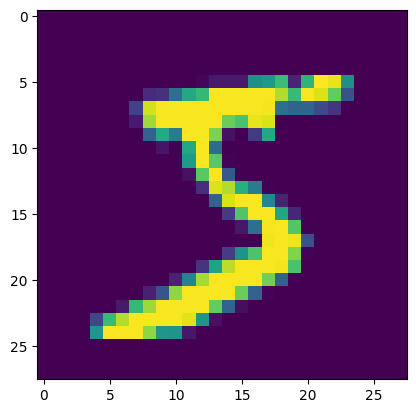

In [71]:

# Assuming X is your data with shape (60000, 784)
# Reshape each row to 28x28

#image_shape = (28, 28)
#X_reshaped = X.reshape(-1, *image_shape).astype(float)
X_reshaped = X.reshape(-1, 28,28).astype(float)

# Plotting the first few images
num_images_to_plot = 1
for i in range(num_images_to_plot):
    plt.subplot(1, num_images_to_plot, i + 1)
    plt.imshow(X_reshaped[i], interpolation='nearest')  # Use cmap='viridis' for colors
    #plt.axis('off')  # Turn off axis labels for clarity

plt.show()


In [32]:
class GausBayes():
  def fit(self,X,y,epsilon=1e-2):
    self.likelihoods=dict()
    self.priors=dict()
    self.K=set(y.astype(int))    #astype converts all values in y to integers

    for k in self.K:
      X_k = X[y==k,:]
      N_k,D = X_k.shape
      mu_k=X_k.mean(axis=0)

      self.likelihoods[k] = {"mean": X_k.mean(axis=0),
                             "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon*np.identity(D)}
      self.priors[k]=len(X_k)/len(X)

  def predict(self, X):
    N,D= X.shape
    P_hat = np.zeros((N, len(self.K)))
    for k, l in self.likelihoods.items():
      P_hat[:,k]=mvn.logpdf(X,l["mean"],l["cov"]) + np.log(self.priors[k])
    return P_hat.argmax(axis=1)



In [33]:
gaussb=GausBayes()

In [34]:
gaussb.fit(X,y)

In [35]:
y_hat=gaussb.predict(X)

In [29]:
 def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [36]:
accuracy(y,y_hat)   #95.5%

0.9555333333333333

In [61]:
test_data = pd.read_csv('/content/drive/MyDrive/ITC Data Science/Training/Datasets/MNIST_test.csv')

In [ ]:
test_data

In [62]:
X_test = test_data.to_numpy()

In [63]:
y_test=X_test[:,2]

In [64]:
X_test=X_test[:,3:]

In [65]:
min_val = 0
max_val = 255
X_test = (X_test - min_val) / (max_val - min_val)

# Reshape the test data to match the training data
#X_test_reshaped = X_test.reshape(-1, 28, 28).astype(float)

In [66]:
test_result=gaussb.predict(X_test)

In [67]:
accuracy(y_test,test_result)    #94.73%

0.9473

#Naive bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data2 = pd.read_csv('/content/drive/MyDrive/ITC Data Science/Training/Datasets/MNIST_train.csv')

In [ ]:
data2

In [4]:
X=data2.to_numpy()

In [ ]:
X

In [5]:
y=X[:,2]

In [ ]:
y

array([5, 0, 4, ..., 5, 6, 8])

In [6]:
X=X[:,3:]

In [7]:
#X[X > 0] = 1

min_val = 0
max_val = 255

# Apply min-max normalization
X = (X - min_val) / (max_val - min_val)

In [ ]:
X.shape

(60000, 784)

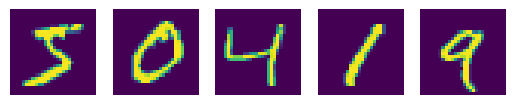

In [ ]:
X_reshaped = X.reshape(-1, 28,28).astype(float)

# Plotting the first few images
num_images_to_plot = 5
for i in range(num_images_to_plot):
    plt.subplot(1, num_images_to_plot, i + 1)
    plt.imshow(X_reshaped[i], interpolation='nearest')  # Use cmap='viridis' for colors
    plt.axis('off')  # Turn off axis labels for clarity

plt.show()

In [8]:
from scipy.stats import multivariate_normal as mvn

In [9]:
class GaussNB():
  def fit(self, X, y, epsilon = 1e-2):
    self.likelihoods=dict()
    self.priors=dict()

    self.K=set(y.astype(int))

    for k in self.K:
      X_k=X[y==k, :]
      self.likelihoods[k]={"mean":X_k.mean(axis=0), "cov": X_k.var(axis=0)+epsilon}
      self.priors[k] = len(X_k)/len(X)


  def predict(self, X):
    N, D = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      #Apply Bayes Theorem

      P_hat[:,k] = mvn.logpdf(X, l["mean"],l["cov"]) + np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [10]:
gnb=GaussNB()

In [11]:
gnb.fit(X,y)

In [12]:
y_hat=gnb.predict(X)

In [13]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [14]:
accuracy(y,y_hat)

0.8015833333333333

In [ ]:
test_result=gnb.predict(X_test)

In [ ]:
accuracy(y_test,test_result)

0.8141

#KNN Classifier


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [42]:
data3 = pd.read_csv('/content/drive/MyDrive/ITC Data Science/Training/Datasets/MNIST_train.csv')

In [43]:
X=data3.to_numpy()

In [44]:
y=X[:,2]  #labels only

In [45]:
X=X[:,3:]  #all data values

In [ ]:
# min-max Normalization technique

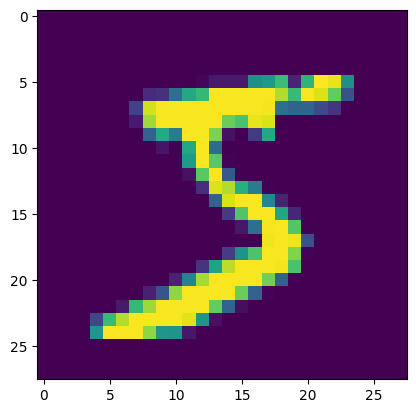

In [46]:

# Assuming X is your data with shape (60000, 784)
# Reshape each row to 28x28

#image_shape = (28, 28)
#X_reshaped = X.reshape(-1, *image_shape).astype(float)

X_reshaped = X.reshape(-1, 28,28).astype(float)

# Plotting the first few images
num_images_to_plot = 1
for i in range(num_images_to_plot):
    plt.subplot(1, num_images_to_plot, i + 1)
    plt.imshow(X_reshaped[i], interpolation='nearest')  # Use cmap='viridis' for colors
    #plt.axis('off')  # Turn off axis labels for clarity

plt.show()


In [47]:
class KNNClassifier():

  def fit(self, X, y):
    self.X=X
    self.y=y

  def predict(self, X, K, epsilon =1e-3):

    N=len(X)
    y_hat = np.zeros(N)
    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt  = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights= gamma_k).argmax()

    return y_hat

In [48]:
knn=KNNClassifier()

In [49]:
knn.fit(X,y)

In [50]:
y_hat=knn.predict(X,1)   #actually N should be in place of 100

KeyboardInterrupt: ignored

In [ ]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [ ]:
accuracy(y,y_hat)